In [31]:
# === 匯入必要套件、固定亂數種子 ===
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 固定隨機種子（讓每次執行結果一致）
np.random.seed(0)
torch.manual_seed(0)

print("套件載入成功，亂數種子已設定")


套件載入成功，亂數種子已設定


In [32]:
# === 生成資料 ===
def runge_function(x):
    return 1.0 / (1.0 + 25.0 * x**2)

N_SAMPLES = 300
x_all = np.linspace(-1.0, 1.0, N_SAMPLES).reshape(-1, 1)
y_all = runge_function(x_all)

# 打亂資料
idx = np.random.permutation(N_SAMPLES)
x_all, y_all = x_all[idx], y_all[idx]

# 分成三等份
n_train = N_SAMPLES // 3
n_val = N_SAMPLES // 3

x_train_np, y_train_np = x_all[:n_train], y_all[:n_train]
x_val_np, y_val_np = x_all[n_train:n_train+n_val], y_all[n_train:n_train+n_val]
x_test_np, y_test_np = x_all[n_train+n_val:], y_all[n_train+n_val:]

# 轉成 tensor
x_train = torch.tensor(x_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
x_val = torch.tensor(x_val_np, dtype=torch.float32)
y_val = torch.tensor(y_val_np, dtype=torch.float32)
x_test = torch.tensor(x_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np, dtype=torch.float32)

print("資料建立完成")
print("Train:", x_train.shape, " Val:", x_val.shape, " Test:", x_test.shape)


資料建立完成
Train: torch.Size([100, 1])  Val: torch.Size([100, 1])  Test: torch.Size([100, 1])


In [33]:
# === 建立模型與設定優化器 ===
model = nn.Sequential(
    nn.Linear(1, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1)
)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print(model)


Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): Tanh()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=1, bias=True)
)


In [34]:
# === 訓練模型 ===
n_epochs = 10000
train_losses, val_losses = [], []

for epoch in range(n_epochs):
    # 前向傳播
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    
    # 反向傳播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 驗證
    with torch.no_grad():
        val_pred = model(x_val)
        val_loss = criterion(val_pred, y_val)
    
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    # 每 1000 回合印一次
    if epoch % 1000 == 0:
        print(f"Epoch {epoch:4d} | Train Loss: {loss.item():.6f} | Val Loss: {val_loss.item():.6f}")

print("訓練完成")


Epoch    0 | Train Loss: 0.358218 | Val Loss: 0.250302
Epoch 1000 | Train Loss: 0.038877 | Val Loss: 0.035324
Epoch 2000 | Train Loss: 0.028647 | Val Loss: 0.027340
Epoch 3000 | Train Loss: 0.021636 | Val Loss: 0.021066
Epoch 4000 | Train Loss: 0.013830 | Val Loss: 0.013514
Epoch 5000 | Train Loss: 0.007892 | Val Loss: 0.007576
Epoch 6000 | Train Loss: 0.004329 | Val Loss: 0.004018
Epoch 7000 | Train Loss: 0.002401 | Val Loss: 0.002145
Epoch 8000 | Train Loss: 0.001403 | Val Loss: 0.001220
Epoch 9000 | Train Loss: 0.000893 | Val Loss: 0.000773
訓練完成


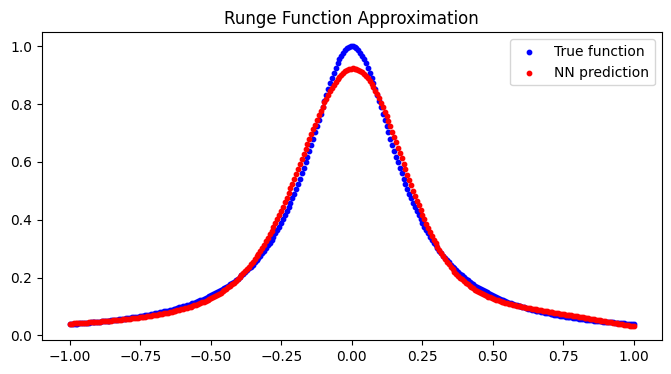

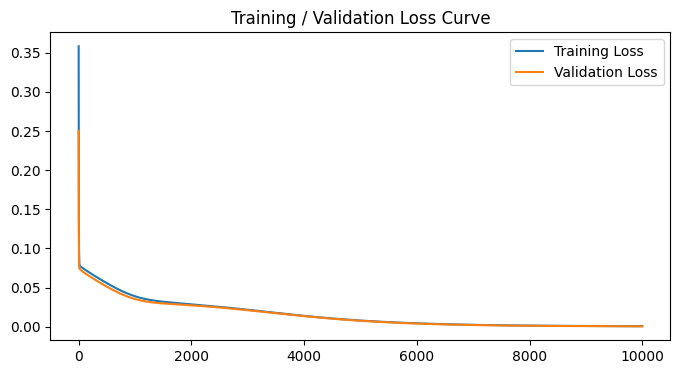

Test MSE = 0.000657
Test Max Error = 0.077128


In [35]:
# === 畫圖與測試 ===
with torch.no_grad():
    y_pred_all = model(torch.tensor(x_all, dtype=torch.float32)).numpy()

# (1) 真實函數 vs NN 預測
plt.figure(figsize=(8,4))
plt.scatter(x_all, y_all, color='blue', s=10, label='True function')
plt.scatter(x_all, y_pred_all, color='red', s=10, label='NN prediction')
plt.legend()
plt.title("Runge Function Approximation")
plt.show()

# (2) 損失曲線
plt.figure(figsize=(8,4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title("Training / Validation Loss Curve")
plt.show()

# (3) 測試誤差
with torch.no_grad():
    test_pred = model(x_test)
    mse_test = criterion(test_pred, y_test).item()
    max_error = torch.max(torch.abs(test_pred - y_test)).item()

print(f"Test MSE = {mse_test:.6f}")
print(f"Test Max Error = {max_error:.6f}")
